# Self-Driving Car Engineer Nanodegree

## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

***
In this project the advanced techniques for the finding of the lane lines on the road has been utilized. The code and some results are presented below. For more detailed description refer to the [writeup.md](https://github.com/pavlovvlad/CarND-Advanced-Lane-Lines-Project/blob/master/writeup.md). 

## Load packages

In [1]:
# to use the numeric libraries
import numpy as np
# to use the openCV functionality
import cv2
# to load the group of images for calibration
import glob
# to read images in RGB color space
import matplotlib.image as mpimg
# to plot images
import matplotlib.pyplot as plt
%matplotlib qt5


## Extract the object points and image points from chessboard pictures

In [2]:
# flag to allow drawing of the result windows
allow_draw = False

# prepare object points, discrete numbers 
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        if allow_draw:
            # Draw and display the corners
            img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
            cv2.imshow('img',img)
            cv2.waitKey(500)
            
if allow_draw:
    cv2.destroyAllWindows()

print('Object points and image points are extracted.')


Object points and image points are extracted.


## Find the camera calibration matrix and distortion coefficients

Camera calibration matrix and distortion coefficients are calculated.

Image shape:  (720, 1280, 3)

Distortion coefficients: 
 k1 =  -0.241017967805 
 k2 =  -0.0530720497347 
 p1 =  -0.00115810317674 
 p2 =  -0.000128318543555 
 k3 =  0.0267124302878

Camera calibration matrix: [[  1.15396093e+03   0.00000000e+00   6.69705359e+02]
 [  0.00000000e+00   1.14802495e+03   3.85656232e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


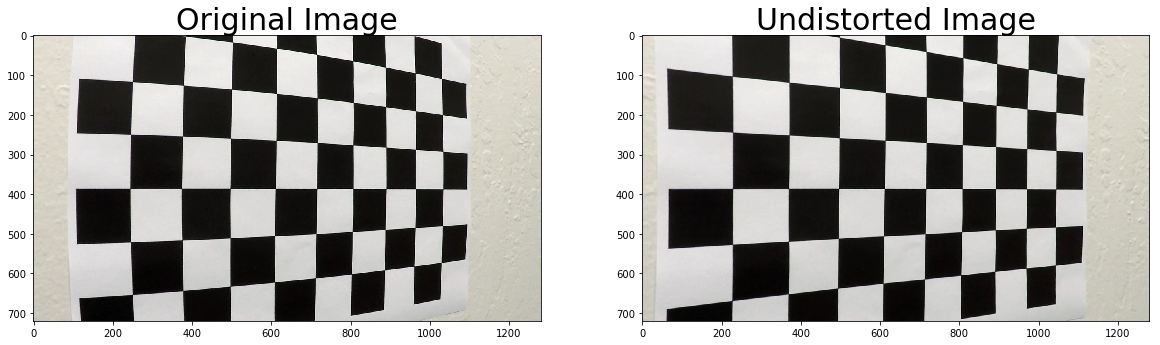

In [3]:
import pickle
%matplotlib inline

# read an image
img = cv2.imread('camera_cal/calibration5.jpg')
img_size = (img.shape[1], img.shape[0])

# calculate the camera calibration matrix given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

# save the camera calibration result for later use
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_cal/dist_coeffs.p", "wb" ) )

# perform undistortion on the test image
dst = cv2.undistort(img, mtx, dist, None, mtx)

# change the color space
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

print('Camera calibration matrix and distortion coefficients are calculated.\n')
print ("Image shape: ", img.shape)
print('\nDistortion coefficients: \n', "k1 = ", dist[0][0], "\n k2 = ", dist[0][1], \
      "\n p1 = ", dist[0][2], "\n p2 = ", dist[0][3], "\n k3 = ", dist[0][4])
print('\nCamera calibration matrix:', mtx)

In [4]:
aerror = []
# calculate the re-projection error 
for i in range(len(objpoints)):
    # transform the object point to image point
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    # calculate the absolute norm between what we got with our transformation and the corner finding algorithm
    aerror.append(cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2))

print ("Number of the chessboard images with [9x6] corner points: ", len(objpoints) , \
       "\nMean re-projection error: ", np.mean(aerror), "+/-", np.std(aerror))

Number of the chessboard images with [9x6] corner points:  17 
Mean re-projection error:  0.153521693302 +/- 0.0501852358604


## Test Images

To build the pipeline the images from the directory "test_images" has been used.

In [5]:
import os
os.listdir("test_images/")

['straight_lines1.jpg',
 'straight_lines2.jpg',
 'test1.jpg',
 'test2.jpg',
 'test3.jpg',
 'test4.jpg',
 'test5.jpg',
 'test6.jpg']

## Distortion correction

Image shape:  (720, 1280, 3)


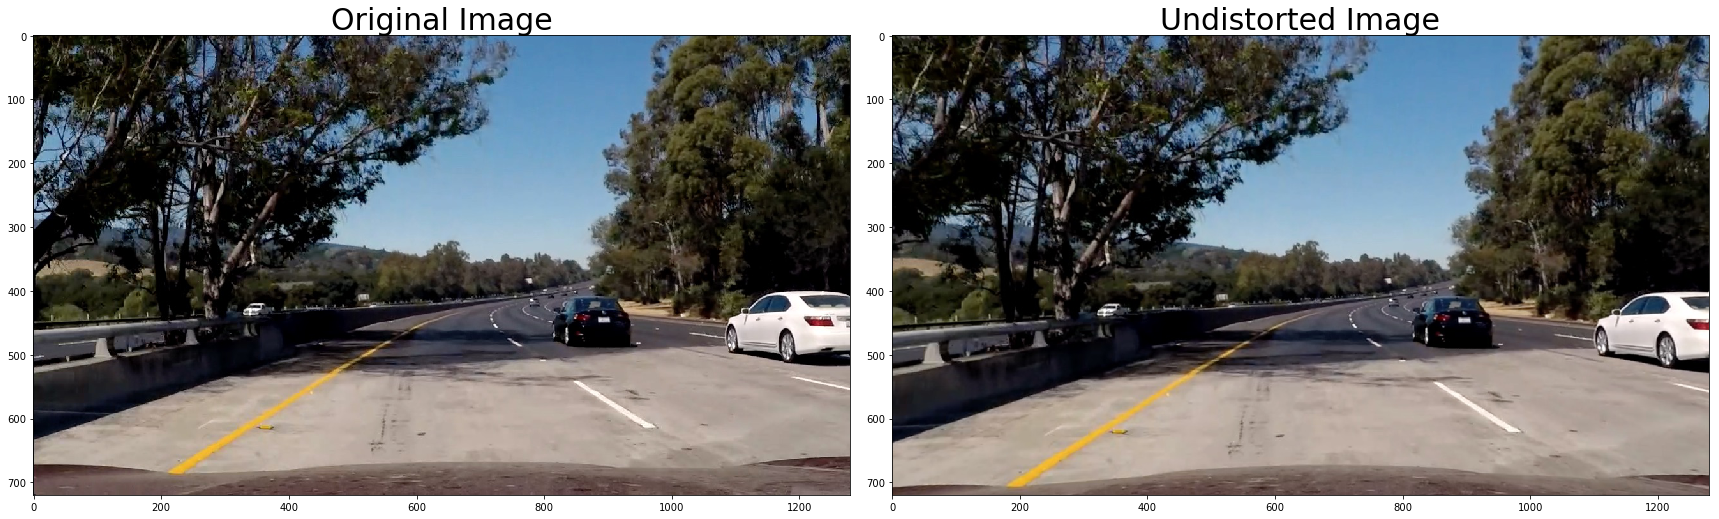

In [6]:
filename = 'test_images/test5.jpg'#straight_lines2.jpg'

# read in the saved camera matrix and distortion coefficients
dist_pickle = pickle.load( open( "camera_cal/dist_coeffs.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# read the test image
img = cv2.imread(filename)

# perform undistortion on the test image
undst = cv2.undistort(img, mtx, dist, None, mtx)

# change the color space
undst = cv2.cvtColor(undst, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print ("Image shape: ", img.shape)

# plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undst)
ax2.set_title('Undistorted Image', fontsize=30)

## Image pre-processing

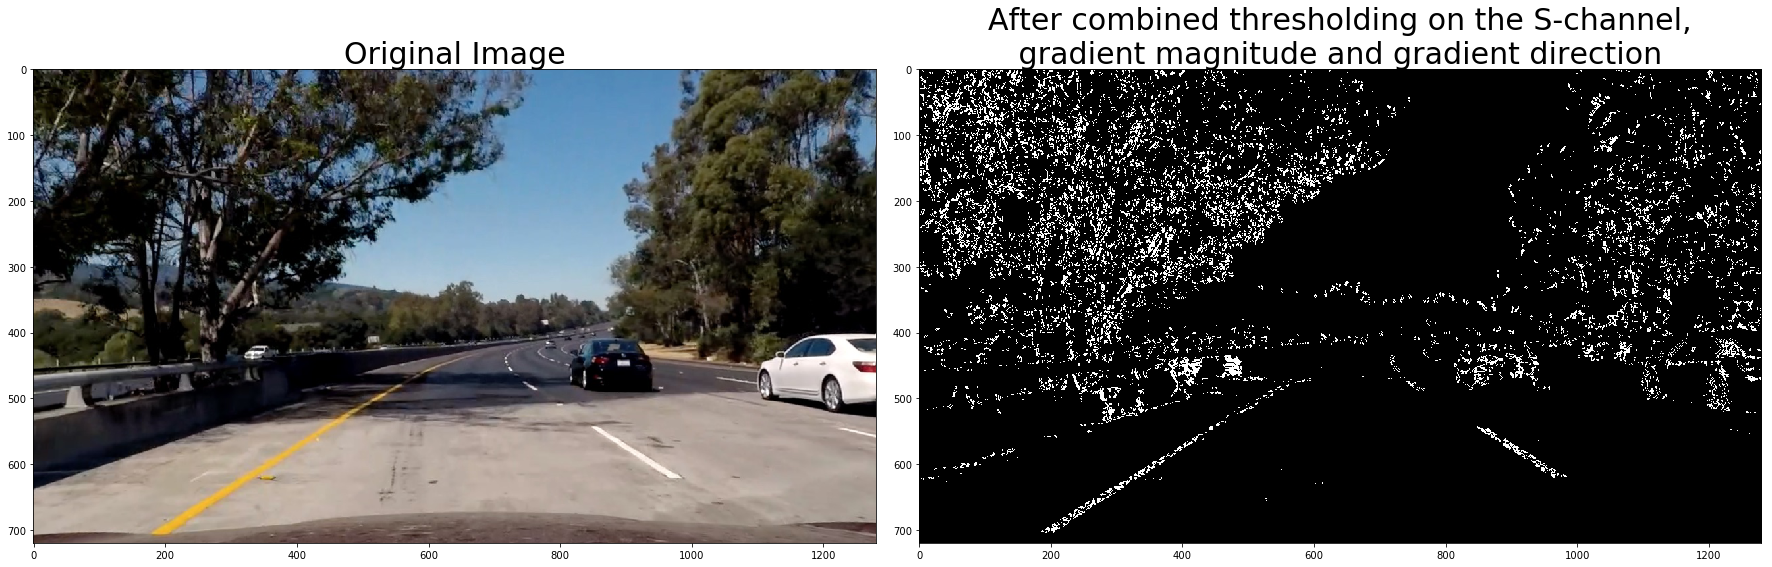

In [7]:
# function performs the image pre-processing
def generate_binary_image(img, d_thresh=(0, np.pi/2), s_thresh=(170, 255), mag_thresh=(30, 100), sobel_kernel=5):
    img = np.copy(img)
    
    # convert to HLS color space and separate the S and L channels
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    
    # threshold saturation channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    # perform sobel x on L-channel
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    
    # perform sobel y on L-channel
    sobely = cv2.Sobel(l_channel, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # absolute x derivative to accentuate lines away from horizontal
    abs_sobelx = np.absolute(sobelx) 
    
    # absolute y derivative to accentuate lines away from vertical
    abs_sobely = np.absolute(sobely)
    
    # calculate the direction of the gradient
    direction = np.arctan2(abs_sobely, abs_sobelx)
    
    # create a binary mask where direction thresholds are met
    d_binary = np.zeros_like(direction)
    d_binary[(direction >= d_thresh[0]) & (direction <= d_thresh[1])] = 1
    
    # calculate the magnitude 
    abs_sobel = np.sqrt(sobelx * sobelx + sobely * sobely) 
    
    # scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    # create a binary mask where mag thresholds are met
    m_binary = np.zeros_like(scaled_sobel)
    m_binary[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
       
    # combine the two binary thresholds
    combined_binary = np.zeros_like(m_binary)
    combined_binary[((s_binary == 1) | (m_binary == 1)) & (d_binary == 1)] = 1
    #combined_binary[(s_binary == 1) | (m_binary == 1)] = 1
    return combined_binary

# d_thresh = 10:72 in deg
binary_img = generate_binary_image(undst, d_thresh=(np.pi/18, np.pi/3), s_thresh=(170, 255), mag_thresh=(50, 100), sobel_kernel=9) 

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(undst)
ax1.set_title('Original Image', fontsize=30)

ax2.imshow(binary_img, cmap = 'gray')
ax2.set_title('After combined thresholding on the S-channel,\n gradient magnitude and gradient direction ', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


## Perspective transformation (single images)

Source points in pixels [X,Y]: 
 [[  594.   450.]
 [  690.   450.]
 [ 1110.   720.]
 [  200.   720.]]
Destination points in pixels [X,Y] : 
 [[ 320.  180.]
 [ 960.  180.]
 [ 960.  720.]
 [ 320.  720.]]
Binary image shape:  (720, 1280)
Perspective transform matrix was saved.


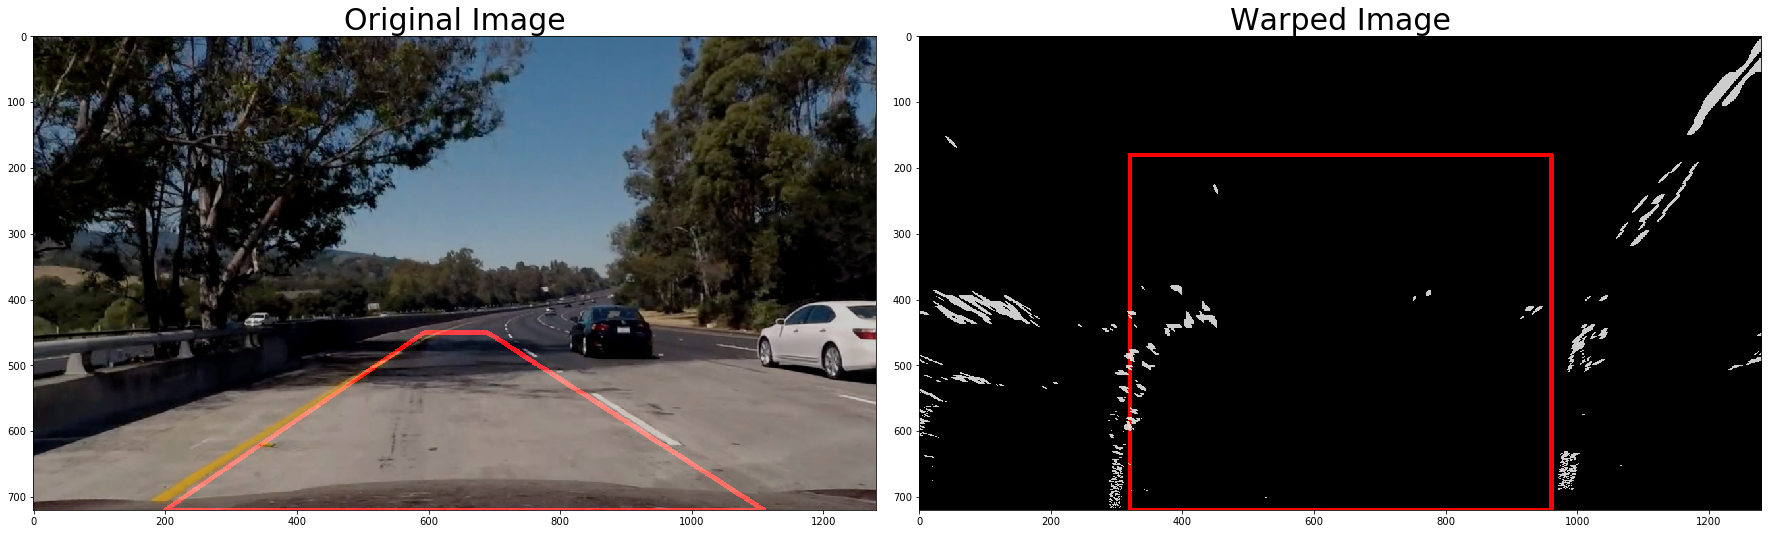

In [8]:
# function performs the perspective transformation
def corners_unwarp(img, src, dst):   
    # get the transform matrix M
    M = cv2.getPerspectiveTransform(src, dst)
    
    # warp input image to a top-down view
    warped = cv2.warpPerspective(img, M, (img.shape[1],img.shape[0]), flags=cv2.INTER_LINEAR)
    
    return warped, M

def weighted_img(initial_img, points, α=0.8, β=1., λ=0.):
    
    # draw the polyline
    img = np.zeros((initial_img.shape[0], initial_img.shape[1], 3), dtype=np.uint8) 
    points2 = np.array(points, np.int32)
    points2 = points2.reshape((-1,1,2))
    cv2.polylines(img,[points2],True,(255,0,0),5)

    return cv2.addWeighted(initial_img, α, img, β, λ)

img_size = undst.shape

# define 4 source points
src_points = np.float32(
[[(img_size[1] / 2) - 46,(img_size[0] / 2) + 90],
[(img_size[1] / 2) + 50,(img_size[0] / 2) + 90],
[img_size[1] - 170, img_size[0]],
[200, img_size[0]]])

print("Source points in pixels [X,Y]: \n", src_points)

# define 4 destination points
dst_points = np.float32(
[[img_size[1]/4, img_size[0]/4],
[img_size[1]*3/4, img_size[0]/4],
[img_size[1]*3/4, img_size[0]],
[img_size[1]/4, img_size[0]]])

print("Destination points in pixels [X,Y] : \n", dst_points)

print ("Binary image shape: ", binary_img.shape)

# perform the perspective transformation on the undistorted image (temporary)
#top_down, perspective_M = corners_unwarp(undst, src_points, dst_points)
# perform the perspective transformation on the binary image
top_down, perspective_M = corners_unwarp(binary_img, src_points, dst_points)

# save the perspective transform matrix for later use
dist_pickle = {}
dist_pickle["perspective_M"] = perspective_M
pickle.dump( dist_pickle, open( "camera_cal/perspective_transform_matrix.p", "wb" ) )
print ("Perspective transform matrix was saved.")
# scale to 8-bit (0 - 255) and convert to type = np.uint8
scaled_top_down= np.uint8(255*top_down/np.max(top_down))

cv2.imwrite('output_images/Wraped_image.jpg',top_down)
# plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(weighted_img(undst, src_points))
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(weighted_img(np.array(cv2.merge((scaled_top_down,scaled_top_down,scaled_top_down)),np.uint8), dst_points), cmap='gray')
#ax2.imshow(scaled_top_down, cmap='gray')
ax2.set_title('Warped Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


## Extraction of the lane-line features and polynomial fitting with convolution (single images)

[(296.0, 1017.0), (288.0, 961.0), (314.0, 990.0), (400.0, 994.0), (349.0, 995.0), (249.0, 1094.0), (149.0, 1134.0), (49.0, 1197.0), (-50.0, 1229.0)]
(720, 1280)


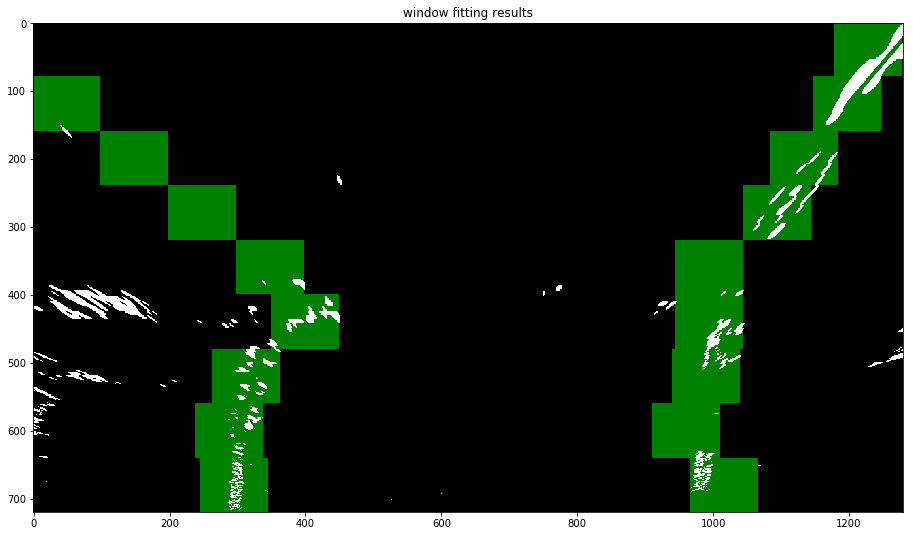

In [9]:

# Read in a thresholded image
warped = scaled_top_down# mpimg.imread('output_images/Wraped_image.jpg')
# window settings
window_width = 100 
window_height = 80 # Break image into 9 vertical layers since image height is 720
margin = 100 # How much to slide left and right for searching

def window_mask(width, height, img_ref, center,level):
    output = np.zeros_like(img_ref)
    output[int(img_ref.shape[0]-(level+1)*height):int(img_ref.shape[0]-level*height), \
           max(0,int(center-width/2)):min(int(center+width/2),img_ref.shape[1])] = 1
    return output

def find_window_centroids(warped, window_width, window_height, margin):
    
    window_centroids = [] # Store the (left,right) window centroid positions per level
    window = np.ones(window_width) # Create our window template that we will use for convolutions
    
    # First find the two starting positions for the left and right lane by using np.sum to get the vertical image slice
    # and then np.convolve the vertical image slice with the window template 
    
    # Sum quarter bottom of image to get slice, could use a different ratio
    l_sum = np.sum(warped[int(3*warped.shape[0]/4):,:int(warped.shape[1]/2)], axis=0)
    l_center = np.argmax(np.convolve(window,l_sum))-window_width/2
    r_sum = np.sum(warped[int(3*warped.shape[0]/4):,int(warped.shape[1]/2):], axis=0)
    r_center = np.argmax(np.convolve(window,r_sum))-window_width/2+int(warped.shape[1]/2)
    
    # Add what we found for the first layer
    window_centroids.append((l_center,r_center))
    
    # Go through each layer looking for max pixel locations
    for level in range(1,(int)(warped.shape[0]/window_height)):
        # convolve the window into the vertical slice of the image
        image_layer = np.sum(warped[int(warped.shape[0]-(level+1)*window_height):int(warped.shape[0]-level*window_height),:], axis=0)
        conv_signal = np.convolve(window, image_layer)
        # Find the best left centroid by using past left center as a reference
        # Use window_width/2 as offset because convolution signal reference is at right side of window, not center of window
        offset = window_width/2
        l_min_index = int(max(l_center+offset-margin,0))
        l_max_index = int(min(l_center+offset+margin,warped.shape[1]))
        l_center = np.argmax(conv_signal[l_min_index:l_max_index])+l_min_index-offset
        # Find the best right centroid by using past right center as a reference
        r_min_index = int(max(r_center+offset-margin,0))
        r_max_index = int(min(r_center+offset+margin,warped.shape[1]))
        r_center = np.argmax(conv_signal[r_min_index:r_max_index])+r_min_index-offset
        # Add what we found for that layer
        window_centroids.append((l_center,r_center))

    return window_centroids

window_centroids = find_window_centroids(warped, window_width, window_height, margin)
print(window_centroids)
# If we found any window centers
if len(window_centroids) > 0:

    # Points used to draw all the left and right windows
    l_points = np.zeros_like(warped)
    r_points = np.zeros_like(warped)

    # Go through each level and draw the windows
    for level in range(0,len(window_centroids)):
        # Window_mask is a function to draw window areas
        l_mask = window_mask(window_width,window_height,warped,window_centroids[level][0],level)
        r_mask = window_mask(window_width,window_height,warped,window_centroids[level][1],level)
        # Add graphic points from window mask here to total pixels found 
        l_points[(l_points == 255) | ((l_mask == 1) ) ] = 255
        r_points[(r_points == 255) | ((r_mask == 1) ) ] = 255

    # Draw the results
    template = np.array(r_points+l_points,np.uint8) # add both left and right window pixels together
    zero_channel = np.zeros_like(template) # create a zero color channel
    template = np.array(cv2.merge((zero_channel,template,zero_channel)),np.uint8) # make window pixels green
    warpage = np.array(cv2.merge((warped,warped,warped)),np.uint8) # making the original road pixels 3 color channels
    output = cv2.addWeighted(warpage, 1, template, 0.5, 0.0) # overlay the orignal road image with window results

#If no window centers found, just display orginal road image
else:
    output = np.array(cv2.merge((warped,warped,warped)),np.uint8)
print(l_points.shape)

# Display the final results
plt.subplots(1,1, figsize=(24, 9))
plt.imshow(output)
plt.title('window fitting results')
plt.show()

## Extraction of the lane-line features and polynomial fitting with histogram (single images)

C:\Users\pvlad\Miniconda3\envs\IntroToTensorFlow\lib\site-packages\ipykernel\__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


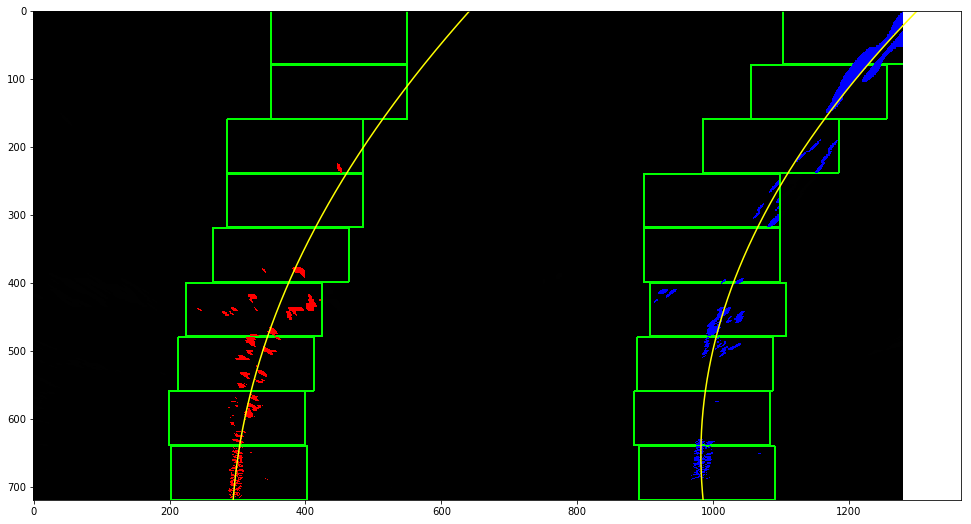

In [10]:
def calculate_points_by_indexes(binary_warped, nonzerox, nonzeroy, left_lane_inds, right_lane_inds):
    
     # extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    # new fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    # generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    return leftx, rightx, lefty, righty, left_fitx, right_fitx, ploty, left_fit, right_fit

    
def fit_lane_lines(binary_warped, nwindows = 9, margin = 100):

    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]/2:,:], axis=0)
    
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255

    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    
    # Set minimum number of pixels found to recenter window
    minpix = 50
    
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height - 1
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)
    
    # calculate fitting coeffs (left_fit, right_fit), x and y coordinated of points for fitting and for plotting in pixels
    leftx, rightx, lefty, righty, left_fitx, right_fitx, ploty, left_fit, right_fit = \
    calculate_points_by_indexes(binary_warped, nonzerox, nonzeroy, left_lane_inds, right_lane_inds)

    return left_lane_inds, right_lane_inds, leftx, rightx, lefty, righty, left_fitx, right_fitx, ploty, left_fit, right_fit, out_img


# choose the number of sliding windows
nwindows = 9

# fit the left and right lane lines
left_lane_inds, right_lane_inds, leftx, rightx, lefty, righty, left_fitx, right_fitx, \
ploty, left_fit, right_fit, out_img = fit_lane_lines(scaled_top_down, nwindows)

# identify the x and y positions of all nonzero pixels in the image
nonzero = scaled_top_down.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
    
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

plt.subplots(1,1, figsize=(24, 9))
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')

## Skip the sliding windows step

(720, 0)

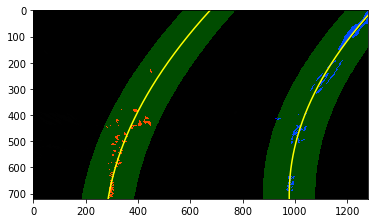

In [11]:
def fit_lane_lines_without_window(binary_warped, left_fit, right_fit, margin = 100):

    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & \
                      (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & \
                       (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # calculate fitting coeffs (left_fit, right_fit), x and y coordinated of points for fitting and for plotting in pixels
    leftx, rightx, lefty, righty, left_fitx, right_fitx, ploty, left_fit, right_fit = \
    calculate_points_by_indexes(binary_warped, nonzerox, nonzeroy, left_lane_inds, right_lane_inds)
    
    return left_lane_inds, right_lane_inds, leftx, rightx, lefty, righty, left_fitx, right_fitx, ploty, left_fit, right_fit

# fit the left and right lane lines
left_lane_inds, right_lane_inds, leftx, rightx, lefty, righty, left_fitx, right_fitx, \
ploty, left_fit, right_fit = fit_lane_lines_without_window(scaled_top_down, left_fit, right_fit)

nonzero = scaled_top_down.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
    
# Create an image to draw on and an image to show the selection window
out_img = np.dstack((scaled_top_down, scaled_top_down, scaled_top_down))*255
window_img = np.zeros_like(out_img)

# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

## Calculation of the curvature of the lane and the position of the vehicle with respect to center (single images)

In [12]:
# factors for the conversions in x and y from pixels space to meters
# based on lane width and landmarks by perspective transofrmation
ym_per_pix = 35/(720 - 180) 
xm_per_pix = 3.7/(960 - 320) 

# function to calculate radius
def calc_radius(y_values_pixels, ym_per_pix, fit_coeffs): 

    # calculate the new radii of curvature in meters
    return ((1.0 + (2.0*fit_coeffs[0]*np.max(y_values_pixels)*ym_per_pix + fit_coeffs[1])**2.0)**1.5) / np.absolute(2*fit_coeffs[0])
    
# Fit new polynomials to x,y in world space
left_fit_meters = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_meters = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)

radius_left = calc_radius(lefty, ym_per_pix, left_fit_meters)
radius_right = calc_radius(righty,  ym_per_pix, right_fit_meters)

# calculate the offset under assumption that the camera is placed in the middle of ego vehicle
lane_offset = (img_size[1]/2 - (left_fitx[-1]+right_fitx[-1])/2)*xm_per_pix

# plot radius of curvature in meters
print("Left side: ",radius_left, 'm', "\nRight side: ", radius_right, 'm', "\nMean radius in curve: ", (radius_right + radius_left)/2, 'm')

# plot lateral offset inside of the driven lane in meters
if lane_offset > 0.0 :
    print('Vehicle is ', lane_offset, 'm left from the lane center')
else:
    print('Vehicle is ', abs(lane_offset), 'm right from the lane center')


Left side:  703.842134891 m 
Right side:  567.428326979 m 
Mean radius in curve:  635.635230935 m
Vehicle is  0.0442744892494 m left from the lane center


## Project detected lane back onto the original image

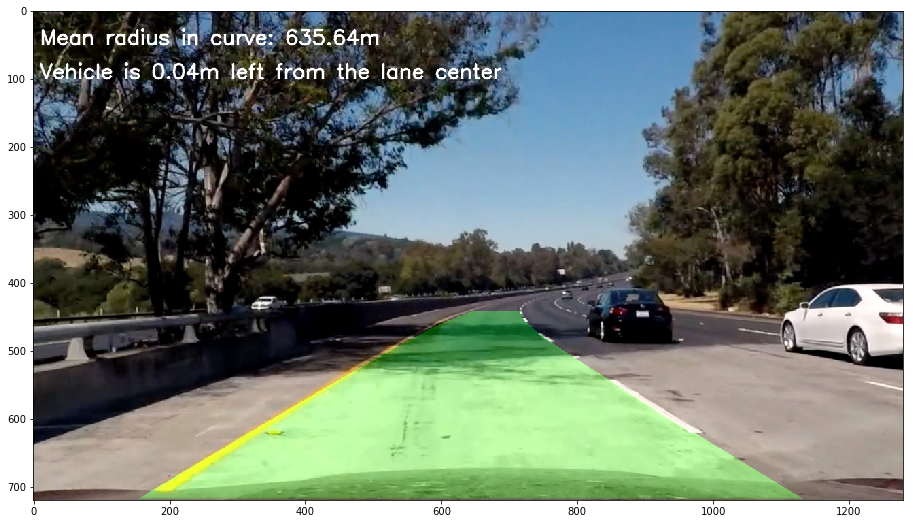

In [13]:
# create an image to draw the lines on
def project_lanes(undst, warped, perspective_M, left_fitx, right_fitx, ploty):
    warp_zero = np.zeros_like(warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # calculate the inverse perspective matrix
    try:
        Minv = np.linalg.inv(perspective_M)
    except numpy.linalg.LinAlgError:
        # not invertible
        pass
    else:
        # warp the blank back to original image space using inverse perspective matrix (Minv)
        newwarp = cv2.warpPerspective(color_warp, Minv, (undst.shape[1], undst.shape[0])) 

        # combine the result with the original image
        result = cv2.addWeighted(undst, 1, newwarp, 0.3, 0)
    return result

undst_with_lane = project_lanes(undst, scaled_top_down, perspective_M, left_fitx, right_fitx, ploty)

# put in image 
cv2.putText(undst_with_lane,'Mean radius in curve: ' + "{:.2f}".format((radius_right + radius_left)/2) + 'm',(10,50), \
            cv2.FONT_ITALIC, 1,(255,255,255), 2 ,cv2.LINE_AA)

if lane_offset > 0.0:
    cv2.putText(undst_with_lane,'Vehicle is ' + "{:.2f}".format(lane_offset) + 'm left from the lane center',(10,100), \
                cv2.FONT_ITALIC, 1,(255,255,255), 2 ,cv2.LINE_AA)
else:
    cv2.putText(undst_with_lane,'Vehicle is ' + "{:.2f}".format(abs(lane_offset)) + 'm right from the lane center',(10,100), \
                cv2.FONT_ITALIC, 1,(255,255,255), 2 ,cv2.LINE_AA)
plt.subplots(1,1, figsize=(24, 9))
plt.imshow(undst_with_lane)

## Test on Videos

In [14]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

## Define Line class

In [15]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line in pixels
        self.recent_xfitted_pix = [] 
        #average x values of the fitted line over the last n iterations
        self.average_x = None
        # polynomial coefficients last n fits of the line in meters
        self.recent_fit = []
        # polynomial coefficients of the last fit in pixels
        self.last_fit_pixels = []
        #polynomial coefficients averaged over the last n iterations
        self.average_fit = None
        #distance in meters of vehicle center from the line
        #self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        #self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        #self.allx = None  
        #y values for detected line pixels
        #self.ally = None
        # line curvature radius
        self.radius = []
        # counter of how many frames the line has been detected wrongly
        self.det_counter = 0
        
    def set_values(self, radius, fit_coeffs_meters, fit_coeffs_pixels, ploty, num_frames_smooth, lane_center_offset, all_pixels_x, all_pixels_y):
        self.detected = True
        
        # x values of the last n fits of the line in pixels
        self.recent_xfitted_pix.append(fit_coeffs_pixels[0]*ploty**2 + fit_coeffs_pixels[1]*ploty + fit_coeffs_pixels[2]) 
        
        # polynomial coefficients last n fits of the line
        self.recent_fit.append(fit_coeffs_meters)
        
        # polynomial coefficients of the last fit in pixels
        self.last_fit_pixels = fit_coeffs_pixels
        
        # set the radius
        self.radius.append(radius)
        
        # remove first element if the number of frames for smoothing has been achieved
        if len(self.recent_xfitted_pix) > num_frames_smooth:
            del self.recent_xfitted_pix[0]
            del self.recent_fit[0]
            del self.radius[0]
            
        # average x values of the fitted line over the last n iterations
        self.average_x = np.mean(self.recent_xfitted_pix, axis=0)

        # polynomial coefficients averaged over the last n iterations
        self.average_fit = np.mean(self.recent_fit, axis=0)
        
        # distance in meters of vehicle center from the line
        #self.line_base_pos = lane_center_offset
        
        # difference in fit coefficients between last and new fits
        # if len(self.recent_xfit) > 1
        #    self.diffs = self.recent_fit[-1] - self.recent_fit[-2]
        
        # x values for detected line pixels
        #self.allx = all_pixels_x
        
        # y values for detected line pixels
        #self.ally = all_pixels_y


In [16]:
def process_image(image):
    
    global reset_flag
    
    # set initially the flag as valid
    flag_valid_frame = True
    
    # Step 1. Perform undistortion
    undst = cv2.undistort(image, mtx, dist, None, mtx)
    img_size = undst.shape
    
    # Step 2. Compute binary image
    binary_img = generate_binary_image(undst, d_thresh=(np.pi/18, np.pi/3), s_thresh=(170, 255), mag_thresh=(50, 100), sobel_kernel=9) 

    # Step 3. Apply the perspective transformation 
    top_down = cv2.warpPerspective(binary_img, perspective_M, (img.shape[1],img.shape[0]), flags=cv2.INTER_LINEAR)
    
    # Step 4. Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_top_down= np.uint8(255*top_down/np.max(top_down))
    
    # check if the new search with window is required   
    if right_line.det_counter > allowed_failed_frames:
        reset_flag = True
    
    # Step 5. Fitting
    if reset_flag:
        # fit lane lines with the sliding window 
        left_lane_inds, right_lane_inds, leftx, rightx, lefty, righty, left_fitx, right_fitx, ploty, left_fit_pix, \
        right_fit_pix, out_img = fit_lane_lines(scaled_top_down, nwindows = 9)
    else:
        # fit lane lines without the sliding window (based on the fit from the step before)
        left_lane_inds, right_lane_inds, leftx, rightx, lefty, righty, left_fitx, right_fitx, ploty, left_fit_pix, \
        right_fit_pix = fit_lane_lines_without_window(scaled_top_down, left_line.last_fit_pixels, right_line.last_fit_pixels)

    # set flag to false in order to process without new window search at the next step 
    reset_flag = False

    # ------- Change the scope from pixels to meters -----------

    # Step 6. Fit new polynomials to x,y in world space in meter
    left_fit_meter = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_meter = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)

    # create y-coordinates of fitted lanes in meter
    plotym = ym_per_pix*ploty

    # Step 7. Curvature and lateral offset calculation with new averaged fitting coefficients
    left_radius = calc_radius(plotym, ym_per_pix, left_fit_meter)
    right_radius = calc_radius(plotym, ym_per_pix, right_fit_meter)

    # calculate the offset under assumption that the camera is placed in the middle of ego vehicle
    lane_offset = (img_size[1]/2 - (left_fitx[-1]+right_fitx[-1])/2)*xm_per_pix

    # Step 8. Produce the checks between left and right lines
    # checking that detected lane lines have similar radius 
    if abs(left_radius - right_radius) > allowed_delta_radius:
        # use the old values
        flag_valid_frame = False
        print('Failed due to delta in radius between lines. left_radius =', left_radius , 'right_radius =', right_radius )

    # checking that detected lane lines are separated by approximately the right distance horizontally
    left_fitx_meter = left_fit_meter[0]*plotym**2 + left_fit_meter[1]*plotym + left_fit_meter[2]
    right_fitx_meter = right_fit_meter[0]*plotym**2 + right_fit_meter[1]*plotym + right_fit_meter[2]
    
    delta_last = abs(left_fitx_meter[-1] - right_fitx_meter[-1])
    delta_first = abs(left_fitx_meter[0] - right_fitx_meter[0])
    
    if (delta_last - delta_first) > allowed_delta_distance:
        # use the old values
        flag_valid_frame = False
        print('Failed due to delta lateral distance between lines. delta_last =', delta_last , 'delta_first =', delta_first )
    
    # check if the horizontal distance between detected lines is close to the normal lane width
    if  abs(delta_first - standard_lane_width) > allowed_delta_normal_lane_width:
        reset_flag = True
        print('Failed due to wrong horizontal distance between detected lines. delta_first =', delta_first , \
              'standard_lane_width =', standard_lane_width, ' allowed_delta_normal_lane_width =', allowed_delta_normal_lane_width)
        
    # Step 9. Set the values in lane classes
    if flag_valid_frame:        
        # set the left line data 
        left_line.set_values(left_radius, left_fit, left_fit_pix, ploty, num_frames_smooth, \
                             abs(img_size[1]/2 - left_fitx[-1])*xm_per_pix, leftx, lefty)

        # set the right line data
        right_line.set_values(right_radius, right_fit, right_fit_pix, ploty, num_frames_smooth, \
                              abs(right_fitx[-1] - img_size[1]/2)*xm_per_pix, rightx, righty)
        # reset counters of the failed frames
        left_line.det_counter = 0
        right_line.det_counter = 0
    
    else:# increment counters of the failed frames
        left_line.det_counter += 1
        right_line.det_counter += 1
    
    # Step 10. Project lane on initial image
    #undst_with_lane = project_lanes(undst, scaled_top_down, perspective_M, left_fitx, right_fitx, ploty)
    undst_with_lane = project_lanes(undst, scaled_top_down, perspective_M, left_line.average_x, \
                                        right_line.average_x, ploty)
    # Step 11. draw text on the image 
    cv2.putText(undst_with_lane,'Mean radius in curve: ' + "{:.2f}".format((left_line.radius[-1] + right_line.radius[-1])/2) \
                + 'm',(10,50), cv2.FONT_ITALIC, 1,(255,255,255), 2 ,cv2.LINE_AA)

    if lane_offset > 0.0:
        cv2.putText(undst_with_lane,'Vehicle is ' + "{:.4f}".format(lane_offset) + 'm left from the lane center',(10,100), \
                    cv2.FONT_ITALIC, 1,(255,255,255), 2 ,cv2.LINE_AA)
    else:
        cv2.putText(undst_with_lane,'Vehicle is ' + "{:.4f}".format(abs(lane_offset)) + 'm right from the lane center',(10,100), \
                    cv2.FONT_ITALIC, 1,(255,255,255), 2 ,cv2.LINE_AA)
      
    #attrs = vars(left_line)
    #print(attrs)
    #print(left_line.bestx) 
    #print('in',reset_flag)
    # plot the image
    plt.subplots(1,1, figsize=(24, 9))
    plt.imshow(undst_with_lane)

    result = undst_with_lane
    return result

False
False
False


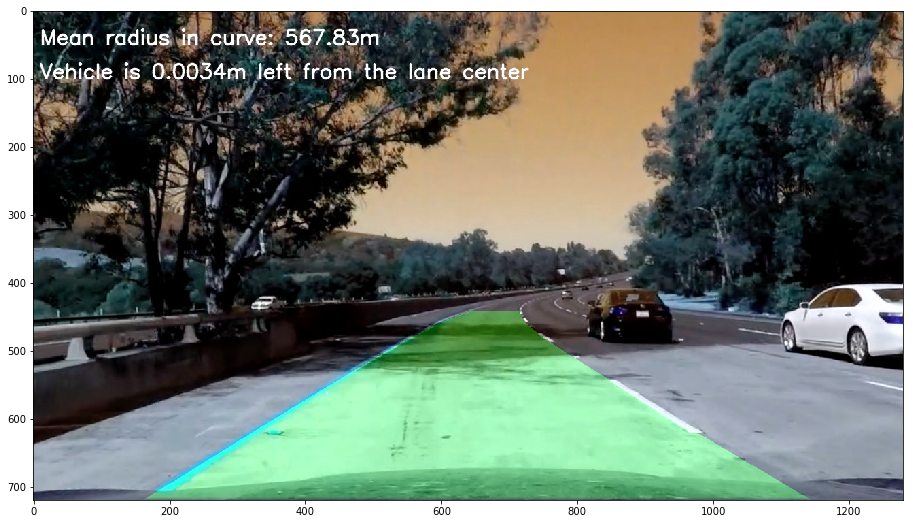

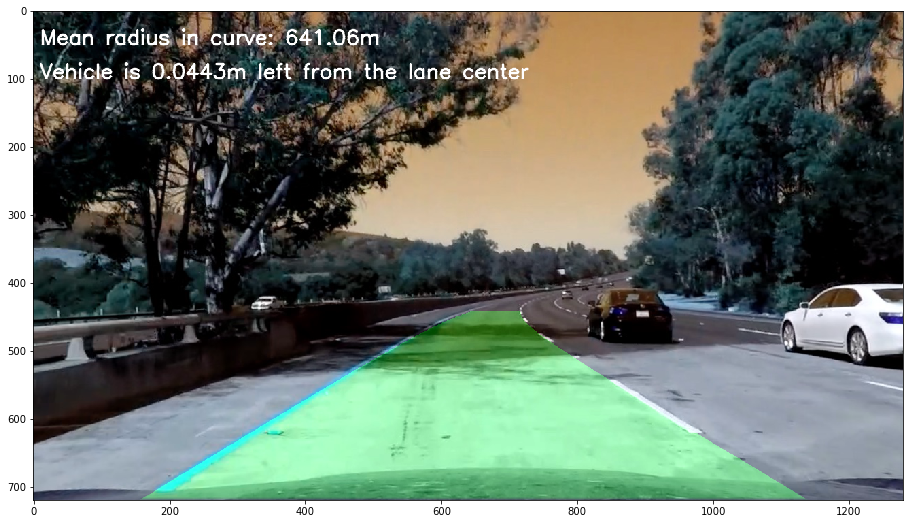

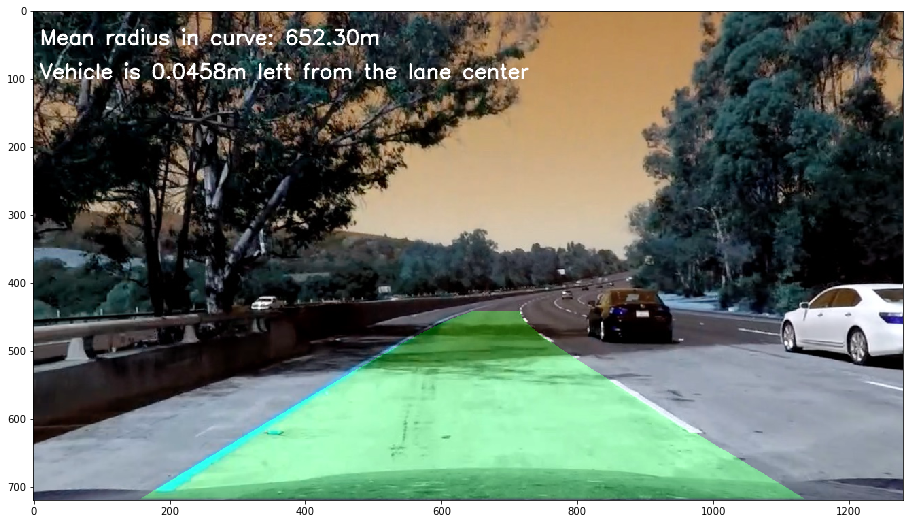

In [17]:
filename_test = 'test_images/test5.jpg'
# init instances of the Lane()-class for accumulation of the data of the lane lines 
left_line = Line()
right_line = Line()

# number of frames for average
num_frames_smooth = 3

# set reset flag initially in True to produce the first step with the sliding window by fitting
reset_flag = True

# allowed number of the frames with failed lane detection before reset of the search with sliding window 
allowed_failed_frames = 2

# allowed difference in curve radius between left and right lines of the same lane
allowed_delta_radius = 5000.

# allowed difference in distance between left and right lines of the same lane at the start and at the end
allowed_delta_distance = 3. # in meter

# normal lane width
standard_lane_width = 3.7 # in meter

# allowed deviation of detected lane width from the normal lane width
allowed_delta_normal_lane_width = 1.7 # in meter

# read the test image
img_test = cv2.imread(filename_test)
result = process_image(img_test)
print(reset_flag)
result = process_image(img_test)
print(reset_flag)
result = process_image(img_test)
print(reset_flag)

In [ ]:
attrs_l = vars(left_line)
print(attrs_l)

attrs_r = vars(right_line)
print(attrs_r)

In [ ]:
# read in the saved camera matrix and distortion coefficients
dist_pickle = pickle.load( open( "camera_cal/dist_coeffs.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# read in the saved perspective transform matrix
dist_pickle = pickle.load( open( "camera_cal/perspective_transform_matrix.p", "rb" ) )
perspective_M = dist_pickle["perspective_M"]

# set reset flag initially in True to produce the first step with the sliding window by fiting
reset_flag = True

output_video = 'result_video.mp4'
clip1 = VideoFileClip('./project_video.mp4')
white_clip = clip1.fl_image(process_image)
%time white_clip.write_videofile(output_video, audio=False)

[MoviePy] >>>> Building video result_video.mp4
[MoviePy] Writing video result_video.mp4


 25%|█████████▊                             | 316/1261 [08:59<20:00,  1.27s/it]

Failed due to delta in radius between lines. left_radius = 11491.3351894 right_radius = 6110.93638609


 25%|█████████▊                             | 318/1261 [09:02<22:58,  1.46s/it]

Failed due to delta in radius between lines. left_radius = 8175.84035092 right_radius = 69844.2263137


 25%|█████████▉                             | 320/1261 [09:06<24:25,  1.56s/it]

Failed due to delta in radius between lines. left_radius = 6398.1142445 right_radius = 26692.4318621


 26%|██████████                             | 324/1261 [09:11<21:50,  1.40s/it]

Failed due to delta in radius between lines. left_radius = 5215.96927513 right_radius = 14710.1109293


 26%|██████████▏                            | 329/1261 [09:19<22:19,  1.44s/it]

Failed due to delta in radius between lines. left_radius = 5684.98311271 right_radius = 20867.3526567


 26%|██████████▏                            | 330/1261 [09:20<21:50,  1.41s/it]

Failed due to delta in radius between lines. left_radius = 3567.2823441 right_radius = 8889.04837645


 26%|██████████▏                            | 331/1261 [09:21<21:27,  1.38s/it]

Failed due to delta in radius between lines. left_radius = 2899.44712815 right_radius = 37555.7449763


 26%|██████████▎                            | 334/1261 [09:25<19:00,  1.23s/it]

Failed due to delta in radius between lines. left_radius = 4158.44862958 right_radius = 29924.1000144


 27%|██████████▍                            | 338/1261 [09:31<22:17,  1.45s/it]

Failed due to delta in radius between lines. left_radius = 7229.06514803 right_radius = 1796.57420741


 27%|██████████▌                            | 341/1261 [09:35<20:16,  1.32s/it]

Failed due to delta in radius between lines. left_radius = 9519.33129212 right_radius = 2100.88972876


 27%|██████████▌                            | 342/1261 [09:36<21:38,  1.41s/it]

Failed due to delta in radius between lines. left_radius = 73835.83054 right_radius = 3460.14637624


 27%|██████████▌                            | 343/1261 [09:38<22:56,  1.50s/it]

Failed due to delta in radius between lines. left_radius = 22845.7366477 right_radius = 2274.22305138


 27%|██████████▋                            | 344/1261 [09:40<22:50,  1.49s/it]

Failed due to delta in radius between lines. left_radius = 31226.324359 right_radius = 2596.7072064


 27%|██████████▋                            | 345/1261 [09:41<22:55,  1.50s/it]

Failed due to delta in radius between lines. left_radius = 10910.1531752 right_radius = 2121.18612229


 27%|██████████▋                            | 346/1261 [09:44<27:06,  1.78s/it]

Failed due to delta in radius between lines. left_radius = 19450.1204762 right_radius = 1669.19369976


 28%|██████████▋                            | 347/1261 [09:45<26:06,  1.71s/it]

Failed due to delta in radius between lines. left_radius = 16754.2407166 right_radius = 8237.31579473


 28%|██████████▊                            | 348/1261 [09:47<25:48,  1.70s/it]

Failed due to delta in radius between lines. left_radius = 19136.7310352 right_radius = 2589.53936023


 28%|██████████▊                            | 351/1261 [09:52<25:35,  1.69s/it]

Failed due to delta in radius between lines. left_radius = 15265.240299 right_radius = 1818.67980189


 28%|██████████▉                            | 352/1261 [09:54<24:43,  1.63s/it]

Failed due to delta in radius between lines. left_radius = 16961.9291565 right_radius = 4039.76117673


 28%|██████████▉                            | 353/1261 [09:56<28:53,  1.91s/it]

Failed due to delta in radius between lines. left_radius = 7862.90043087 right_radius = 1625.52252593


 28%|██████████▉                            | 354/1261 [09:58<28:10,  1.86s/it]

Failed due to delta in radius between lines. left_radius = 9353.62891653 right_radius = 2105.60020893


 28%|███████████                            | 359/1261 [10:06<23:27,  1.56s/it]

Failed due to delta in radius between lines. left_radius = 2867.65610886 right_radius = 11947.627701


 29%|███████████▎                           | 364/1261 [10:13<20:37,  1.38s/it]

Failed due to delta in radius between lines. left_radius = 9739.90690455 right_radius = 18541.7893761


 29%|███████████▎                           | 365/1261 [10:14<21:41,  1.45s/it]

Failed due to delta in radius between lines. left_radius = 34926.174612 right_radius = 18928.568806


 29%|███████████▎                           | 366/1261 [10:16<22:48,  1.53s/it]

Failed due to delta in radius between lines. left_radius = 21726.5802231 right_radius = 7307.96575885


 29%|███████████▎                           | 367/1261 [10:18<22:39,  1.52s/it]

Failed due to delta in radius between lines. left_radius = 43244.4704462 right_radius = 7943.72546564


 30%|███████████▌                           | 372/1261 [10:25<21:55,  1.48s/it]

Failed due to delta in radius between lines. left_radius = 4134.4211774 right_radius = 105347.979367


 30%|███████████▌                           | 374/1261 [10:28<20:27,  1.38s/it]

Failed due to delta in radius between lines. left_radius = 2032.51642255 right_radius = 15317.2626196


 30%|███████████▋                           | 376/1261 [10:31<20:55,  1.42s/it]

Failed due to delta in radius between lines. left_radius = 1959.60781141 right_radius = 11476.5336013


 30%|███████████▋                           | 377/1261 [10:32<21:11,  1.44s/it]

Failed due to delta in radius between lines. left_radius = 2025.54102606 right_radius = 8770.76082128


 30%|███████████▋                           | 378/1261 [10:33<20:30,  1.39s/it]

Failed due to delta in radius between lines. left_radius = 1876.71655868 right_radius = 9385.63021792


 30%|███████████▊                           | 380/1261 [10:37<23:02,  1.57s/it]

Failed due to delta in radius between lines. left_radius = 2113.52640731 right_radius = 16041.3605138


 30%|███████████▉                           | 384/1261 [10:43<22:37,  1.55s/it]

Failed due to delta in radius between lines. left_radius = 3650.27387127 right_radius = 14451.1865174


 31%|███████████▉                           | 385/1261 [10:44<21:47,  1.49s/it]

Failed due to delta in radius between lines. left_radius = 3227.02009854 right_radius = 12926.1460806


 31%|████████████                           | 389/1261 [10:50<19:33,  1.35s/it]

Failed due to delta in radius between lines. left_radius = 17970.2750628 right_radius = 9129.18248651


 31%|████████████                           | 392/1261 [10:53<17:55,  1.24s/it]

Failed due to delta in radius between lines. left_radius = 11405.2830203 right_radius = 3355.72284876


 31%|████████████▏                          | 393/1261 [10:55<17:52,  1.24s/it]

Failed due to delta in radius between lines. left_radius = 10609.3181319 right_radius = 3126.96960452


 31%|████████████▏                          | 394/1261 [10:56<18:40,  1.29s/it]

Failed due to delta in radius between lines. left_radius = 23907.3183079 right_radius = 2868.81990774


 31%|████████████▏                          | 395/1261 [10:58<20:09,  1.40s/it]

Failed due to delta in radius between lines. left_radius = 12654.0424089 right_radius = 2805.3286487


 31%|████████████▏                          | 396/1261 [10:59<20:02,  1.39s/it]

Failed due to delta in radius between lines. left_radius = 10448.9411698 right_radius = 56722.2929046


 31%|████████████▎                          | 397/1261 [11:00<20:08,  1.40s/it]

Failed due to delta in radius between lines. left_radius = 24916.2127753 right_radius = 8453.88483825


 32%|████████████▎                          | 400/1261 [11:04<19:38,  1.37s/it]

Failed due to delta in radius between lines. left_radius = 31974.7153081 right_radius = 2859.17406657


 32%|████████████▍                          | 401/1261 [11:06<19:37,  1.37s/it]

Failed due to delta in radius between lines. left_radius = 14716.0250592 right_radius = 6666.54024101


 32%|████████████▍                          | 402/1261 [11:07<19:54,  1.39s/it]

Failed due to delta in radius between lines. left_radius = 7845.35005281 right_radius = 2146.26572691


 32%|████████████▌                          | 406/1261 [11:12<18:04,  1.27s/it]

Failed due to delta in radius between lines. left_radius = 8612.15131876 right_radius = 3003.93545965


 32%|████████████▋                          | 409/1261 [11:16<19:00,  1.34s/it]

Failed due to delta in radius between lines. left_radius = 8135.23713354 right_radius = 2479.74779084


 33%|████████████▋                          | 411/1261 [11:19<18:21,  1.30s/it]

Failed due to delta in radius between lines. left_radius = 4613.02481895 right_radius = 249001.116149


 33%|████████████▊                          | 414/1261 [11:23<17:50,  1.26s/it]

Failed due to delta in radius between lines. left_radius = 3049.54791725 right_radius = 9902.24356958


 33%|████████████▊                          | 415/1261 [11:24<17:50,  1.27s/it]

Failed due to delta in radius between lines. left_radius = 3693.10617183 right_radius = 153719.253816


 33%|████████████▉                          | 419/1261 [11:29<16:57,  1.21s/it]

Failed due to delta in radius between lines. left_radius = 14063.0165224 right_radius = 2884.75156052


 33%|█████████████                          | 421/1261 [11:32<18:40,  1.33s/it]

Failed due to delta in radius between lines. left_radius = 10338.0409124 right_radius = 2143.88051344


 33%|█████████████                          | 422/1261 [11:33<18:17,  1.31s/it]

Failed due to delta in radius between lines. left_radius = 124723.830588 right_radius = 2201.66801386


 34%|█████████████                          | 423/1261 [11:34<18:06,  1.30s/it]

Failed due to delta in radius between lines. left_radius = 14650.7986557 right_radius = 3638.06692047


 34%|█████████████                          | 424/1261 [11:35<17:40,  1.27s/it]

Failed due to delta in radius between lines. left_radius = 12686.8737133 right_radius = 2360.89026481


 34%|█████████████▏                         | 425/1261 [11:37<18:34,  1.33s/it]

Failed due to delta in radius between lines. left_radius = 16561.12362 right_radius = 1669.18281846


 34%|█████████████▏                         | 428/1261 [11:41<20:32,  1.48s/it]

Failed due to delta in radius between lines. left_radius = 2712.35075492 right_radius = 8234.21082556


 34%|█████████████▎                         | 429/1261 [11:44<25:51,  1.86s/it]

Failed due to delta in radius between lines. left_radius = 2776.56240757 right_radius = 22062.1871268


 34%|█████████████▎                         | 430/1261 [11:47<29:09,  2.11s/it]

Failed due to delta in radius between lines. left_radius = 2488.5330052 right_radius = 60973.4243826


 34%|█████████████▎                         | 432/1261 [11:52<33:52,  2.45s/it]

Failed due to delta in radius between lines. left_radius = 3604.93517195 right_radius = 10957.7961653


 34%|█████████████▍                         | 433/1261 [11:56<39:02,  2.83s/it]

Failed due to delta in radius between lines. left_radius = 28990.8980601 right_radius = 1952.99924934


 35%|█████████████▍                         | 436/1261 [12:04<36:23,  2.65s/it]

Failed due to delta in radius between lines. left_radius = 4766.80518853 right_radius = 12286.2971146


 35%|█████████████▌                         | 437/1261 [12:07<37:45,  2.75s/it]

Failed due to delta in radius between lines. left_radius = 4088.84366795 right_radius = 23384.7090859


 35%|█████████████▌                         | 438/1261 [12:10<38:10,  2.78s/it]

Failed due to delta in radius between lines. left_radius = 14657.1120192 right_radius = 3717.87071337


 35%|█████████████▌                         | 439/1261 [12:12<37:35,  2.74s/it]

Failed due to delta in radius between lines. left_radius = 50495.7101066 right_radius = 2068.36932588


 35%|█████████████▌                         | 440/1261 [12:15<37:48,  2.76s/it]

Failed due to delta in radius between lines. left_radius = 73123.9134262 right_radius = 2124.55473464


 35%|█████████████▋                         | 441/1261 [12:20<46:33,  3.41s/it]

Failed due to delta in radius between lines. left_radius = 50907.7988165 right_radius = 1837.45860286


 35%|█████████████▋                         | 442/1261 [12:24<47:10,  3.46s/it]

Failed due to delta in radius between lines. left_radius = 5086035.98269 right_radius = 26316.1407856


 35%|█████████████▋                         | 443/1261 [12:26<42:47,  3.14s/it]

Failed due to delta in radius between lines. left_radius = 11481.1499256 right_radius = 4041.03781908


 35%|█████████████▋                         | 444/1261 [12:29<43:43,  3.21s/it]

Failed due to delta in radius between lines. left_radius = 253618.345829 right_radius = 3683.43248127


 35%|█████████████▊                         | 445/1261 [12:35<52:26,  3.86s/it]

Failed due to delta in radius between lines. left_radius = 9483.3366579 right_radius = 3640.76709059


 36%|██████████████                         | 456/1261 [13:03<32:23,  2.41s/it]

Failed due to delta in radius between lines. left_radius = 4064.53304057 right_radius = 71517.3105577


 36%|██████████████▏                        | 457/1261 [13:07<37:22,  2.79s/it]

Failed due to delta in radius between lines. left_radius = 3195.38807838 right_radius = 73255.751497


 37%|██████████████▎                        | 464/1261 [13:26<35:56,  2.71s/it]

Failed due to delta in radius between lines. left_radius = 12529.3077471 right_radius = 4484.03450399


 37%|██████████████▍                        | 465/1261 [13:29<37:35,  2.83s/it]

Failed due to delta in radius between lines. left_radius = 15187.5723279 right_radius = 37650.0929974


 37%|██████████████▍                        | 466/1261 [13:31<33:44,  2.55s/it]

Failed due to delta in radius between lines. left_radius = 89796.479948 right_radius = 5107.29608407


 37%|██████████████▍                        | 467/1261 [13:33<29:11,  2.21s/it]

Failed due to delta in radius between lines. left_radius = 26990.6576407 right_radius = 5466.40373672


 37%|██████████████▌                        | 469/1261 [13:36<24:10,  1.83s/it]

Failed due to delta in radius between lines. left_radius = 24485.5609911 right_radius = 14208.7875408


 37%|██████████████▌                        | 470/1261 [13:37<22:10,  1.68s/it]

Failed due to delta in radius between lines. left_radius = 37777.2090825 right_radius = 3838.48080385


 37%|██████████████▌                        | 471/1261 [13:39<21:34,  1.64s/it]

Failed due to delta in radius between lines. left_radius = 35584.1139958 right_radius = 2386.7630294


 37%|██████████████▌                        | 472/1261 [13:40<20:11,  1.54s/it]

Failed due to delta in radius between lines. left_radius = 11372.9584103 right_radius = 2353.950729


 38%|██████████████▋                        | 473/1261 [13:41<19:20,  1.47s/it]

Failed due to delta in radius between lines. left_radius = 6753.4658585 right_radius = 20106.21535


 38%|██████████████▋                        | 475/1261 [13:44<18:08,  1.38s/it]

Failed due to delta in radius between lines. left_radius = 6915.7157908 right_radius = 31538.2870829


 38%|██████████████▋                        | 476/1261 [13:45<17:27,  1.33s/it]

Failed due to delta in radius between lines. left_radius = 18340.5081476 right_radius = 643716.916038


 38%|██████████████▊                        | 477/1261 [13:46<17:33,  1.34s/it]

Failed due to delta in radius between lines. left_radius = 20337.8644456 right_radius = 8386.42387692


 38%|██████████████▊                        | 478/1261 [13:48<17:49,  1.37s/it]

Failed due to delta in radius between lines. left_radius = 3397057.01205 right_radius = 15725.253319


 38%|██████████████▊                        | 479/1261 [13:49<17:53,  1.37s/it]

Failed due to delta in radius between lines. left_radius = 12750.9019961 right_radius = 161267.417453


 38%|██████████████▊                        | 480/1261 [13:50<17:24,  1.34s/it]

Failed due to delta in radius between lines. left_radius = 16223.8274694 right_radius = 7795.88486906


 38%|██████████████▉                        | 482/1261 [13:53<16:42,  1.29s/it]

Failed due to delta in radius between lines. left_radius = 22514.0645432 right_radius = 3977.74361681


 38%|██████████████▉                        | 483/1261 [13:54<16:43,  1.29s/it]

Failed due to delta in radius between lines. left_radius = 50032.4109478 right_radius = 5139.81883054


 38%|██████████████▉                        | 484/1261 [13:56<17:33,  1.36s/it]

Failed due to delta in radius between lines. left_radius = 32419.7705154 right_radius = 1518.98496304


 38%|███████████████                        | 485/1261 [13:57<16:54,  1.31s/it]

Failed due to delta in radius between lines. left_radius = 14397.1846332 right_radius = 2028.18371717


 39%|███████████████                        | 486/1261 [13:58<15:33,  1.20s/it]

Failed due to delta in radius between lines. left_radius = 27604.6755463 right_radius = 4043.84701237


 39%|███████████████▏                       | 490/1261 [14:03<16:05,  1.25s/it]

Failed due to delta in radius between lines. left_radius = 8759.0902348 right_radius = 2079.80401648


 39%|███████████████▏                       | 491/1261 [14:04<16:30,  1.29s/it]

Failed due to delta in radius between lines. left_radius = 27532.2453997 right_radius = 2699.08056212


 39%|███████████████▏                       | 492/1261 [14:06<17:04,  1.33s/it]

Failed due to delta in radius between lines. left_radius = 28309.3303259 right_radius = 1718.12435643


 39%|███████████████▎                       | 494/1261 [14:08<16:32,  1.29s/it]

Failed due to delta in radius between lines. left_radius = 25496.3601911 right_radius = 3467.56695174


 39%|███████████████▎                       | 495/1261 [14:09<16:18,  1.28s/it]

Failed due to delta in radius between lines. left_radius = 27877.3093016 right_radius = 1379.0119642


 39%|███████████████▎                       | 496/1261 [14:10<15:35,  1.22s/it]

Failed due to delta in radius between lines. left_radius = 26567.6306969 right_radius = 1973.33994505


 39%|███████████████▎                       | 497/1261 [14:12<16:35,  1.30s/it]

Failed due to delta in radius between lines. left_radius = 28447.5509849 right_radius = 3309.69336842


 39%|███████████████▍                       | 498/1261 [14:14<18:30,  1.45s/it]

Failed due to delta in radius between lines. left_radius = 29778.8016089 right_radius = 3417.88601039


 40%|███████████████▍                       | 499/1261 [14:15<17:49,  1.40s/it]

Failed due to delta in radius between lines. left_radius = 10906.117064 right_radius = 2324.43395388


 40%|███████████████▍                       | 500/1261 [14:17<18:16,  1.44s/it]

Failed due to delta in radius between lines. left_radius = 133354.586914 right_radius = 1606.83361394


 40%|███████████████▍                       | 501/1261 [14:18<17:50,  1.41s/it]

Failed due to delta in radius between lines. left_radius = 33975.3533383 right_radius = 2090.0135357


 40%|███████████████▌                       | 502/1261 [14:19<17:09,  1.36s/it]

Failed due to delta in radius between lines. left_radius = 11820.6620819 right_radius = 16959.074382


 40%|███████████████▌                       | 503/1261 [14:21<17:07,  1.36s/it]

Failed due to delta in radius between lines. left_radius = 56890.1351796 right_radius = 479494.366618


 40%|███████████████▌                       | 504/1261 [14:22<17:36,  1.40s/it]

Failed due to delta in radius between lines. left_radius = 31346.5376909 right_radius = 7148.33320536


 40%|███████████████▋                       | 507/1261 [14:26<16:17,  1.30s/it]

Failed due to delta in radius between lines. left_radius = 5111.52020228 right_radius = 86172.0117894


 40%|███████████████▋                       | 508/1261 [14:27<17:00,  1.35s/it]

Failed due to delta in radius between lines. left_radius = 3753.41259857 right_radius = 68453.6444473


 41%|████████████████                       | 518/1261 [14:40<15:11,  1.23s/it]

Failed due to delta in radius between lines. left_radius = 3220.36808797 right_radius = 8959.88816184


 41%|████████████████                       | 519/1261 [14:41<15:38,  1.26s/it]

Failed due to delta in radius between lines. left_radius = 2632.75679453 right_radius = 88232.7094593


 42%|████████████████▎                      | 527/1261 [14:52<16:27,  1.35s/it]

Failed due to delta in radius between lines. left_radius = 1182.08974734 right_radius = 16141.315582


 42%|████████████████▎                      | 529/1261 [14:54<16:09,  1.32s/it]

Failed due to delta in radius between lines. left_radius = 1012.79076269 right_radius = 6817.8832178


 43%|████████████████▉                      | 547/1261 [15:17<14:41,  1.23s/it]

Failed due to delta in radius between lines. left_radius = 10234.3829563 right_radius = 2372.88336662


 44%|█████████████████                      | 552/1261 [15:22<13:17,  1.13s/it]

Failed due to delta in radius between lines. left_radius = 40902.4272219 right_radius = 16380.0733073


 44%|█████████████████▏                     | 554/1261 [15:25<14:21,  1.22s/it]

Failed due to delta in radius between lines. left_radius = 2165.84447067 right_radius = 10807.8732827


 44%|█████████████████▏                     | 555/1261 [15:27<18:33,  1.58s/it]

Failed due to delta in radius between lines. left_radius = 887.63332763 right_radius = 8387.74942686


 44%|█████████████████▎                     | 561/1261 [15:35<15:55,  1.37s/it]

Failed due to delta in radius between lines. left_radius = 10154.8012894 right_radius = 2375.78735428
Failed due to wrong horizontal distance between detected lines. delta_first = 5.8753198471 standard_lane_width = 3.7  allowed_delta_normal_lane_width = 1.7


 45%|█████████████████▍                     | 562/1261 [15:36<15:40,  1.35s/it]

Failed due to wrong horizontal distance between detected lines. delta_first = 5.43376402215 standard_lane_width = 3.7  allowed_delta_normal_lane_width = 1.7


 45%|█████████████████▌                     | 566/1261 [15:41<14:40,  1.27s/it]

Failed due to delta in radius between lines. left_radius = 26870.6167259 right_radius = 2181.77831245


 45%|█████████████████▌                     | 567/1261 [15:43<14:58,  1.29s/it]

Failed due to delta in radius between lines. left_radius = 2237639.84835 right_radius = 5200.53810872


 45%|█████████████████▌                     | 568/1261 [15:44<14:55,  1.29s/it]

Failed due to delta in radius between lines. left_radius = 17044.5397054 right_radius = 30473.9570282


 45%|█████████████████▋                     | 571/1261 [15:48<15:51,  1.38s/it]

Failed due to delta in radius between lines. left_radius = 8542.76595318 right_radius = 2923.60244419


 45%|█████████████████▋                     | 572/1261 [15:50<16:54,  1.47s/it]

Failed due to delta in radius between lines. left_radius = 9953.40966526 right_radius = 1838.48170772


 49%|███████████████████                    | 617/1261 [17:23<36:06,  3.36s/it]

Failed due to wrong horizontal distance between detected lines. delta_first = 1.97928534139 standard_lane_width = 3.7  allowed_delta_normal_lane_width = 1.7


 49%|███████████████████                    | 618/1261 [17:26<36:53,  3.44s/it]

Failed due to wrong horizontal distance between detected lines. delta_first = 1.82163211872 standard_lane_width = 3.7  allowed_delta_normal_lane_width = 1.7


 49%|███████████████████▏                   | 622/1261 [17:42<38:02,  3.57s/it]

Failed due to wrong horizontal distance between detected lines. delta_first = 1.9957268563 standard_lane_width = 3.7  allowed_delta_normal_lane_width = 1.7


 49%|███████████████████▎                   | 624/1261 [17:48<35:09,  3.31s/it]

Failed due to wrong horizontal distance between detected lines. delta_first = 1.89152947336 standard_lane_width = 3.7  allowed_delta_normal_lane_width = 1.7


 50%|███████████████████▎                   | 625/1261 [17:51<33:51,  3.19s/it]

Failed due to wrong horizontal distance between detected lines. delta_first = 1.18161961235 standard_lane_width = 3.7  allowed_delta_normal_lane_width = 1.7


 50%|███████████████████▎                   | 626/1261 [17:53<30:31,  2.88s/it]

Failed due to wrong horizontal distance between detected lines. delta_first = 1.69549136519 standard_lane_width = 3.7  allowed_delta_normal_lane_width = 1.7


 50%|███████████████████▍                   | 627/1261 [17:57<34:26,  3.26s/it]

Failed due to wrong horizontal distance between detected lines. delta_first = 1.29334945668 standard_lane_width = 3.7  allowed_delta_normal_lane_width = 1.7


 50%|███████████████████▍                   | 628/1261 [18:00<33:57,  3.22s/it]

Failed due to wrong horizontal distance between detected lines. delta_first = 1.87139106953 standard_lane_width = 3.7  allowed_delta_normal_lane_width = 1.7


 50%|███████████████████▋                   | 636/1261 [18:22<27:28,  2.64s/it]

Failed due to wrong horizontal distance between detected lines. delta_first = 1.99666109196 standard_lane_width = 3.7  allowed_delta_normal_lane_width = 1.7


 76%|█████████████████████████████▊         | 963/1261 [29:39<13:53,  2.80s/it]

Failed due to delta in radius between lines. left_radius = 6628.36253775 right_radius = 657.959259193


 77%|█████████████████████████████▊         | 965/1261 [29:47<16:43,  3.39s/it]

Failed due to delta in radius between lines. left_radius = 6657.74377732 right_radius = 643.991574587


 77%|█████████████████████████████▉         | 966/1261 [29:50<16:54,  3.44s/it]

Failed due to delta in radius between lines. left_radius = 13844.3895327 right_radius = 552.949562049


 77%|█████████████████████████████▉         | 967/1261 [29:53<16:13,  3.31s/it]

Failed due to delta in radius between lines. left_radius = 6031.90312677 right_radius = 699.601642927


 77%|█████████████████████████████▉         | 968/1261 [29:57<17:14,  3.53s/it]

Failed due to delta in radius between lines. left_radius = 11665.5874407 right_radius = 714.961440566


 77%|█████████████████████████████▉         | 969/1261 [30:00<15:38,  3.21s/it]

Failed due to delta in radius between lines. left_radius = 19457.4819277 right_radius = 673.850813804


 77%|██████████████████████████████         | 970/1261 [30:03<15:01,  3.10s/it]

Failed due to delta in radius between lines. left_radius = 8219.89840309 right_radius = 709.615006496


 78%|██████████████████████████████▎        | 980/1261 [30:41<34:54,  7.46s/it]

Failed due to delta in radius between lines. left_radius = 20623.5512481 right_radius = 786.473585442


 78%|██████████████████████████████▌        | 989/1261 [31:27<16:04,  3.54s/it]

Failed due to wrong horizontal distance between detected lines. delta_first = 5.53074041387 standard_lane_width = 3.7  allowed_delta_normal_lane_width = 1.7


 79%|██████████████████████████████▋        | 992/1261 [32:01<48:18, 10.77s/it]

Failed due to delta in radius between lines. left_radius = 24858.6468462 right_radius = 75.3809333079
Failed due to wrong horizontal distance between detected lines. delta_first = 6.60656756069 standard_lane_width = 3.7  allowed_delta_normal_lane_width = 1.7


 79%|██████████████████████████████▋        | 993/1261 [32:19<56:59, 12.76s/it]

Failed due to delta in radius between lines. left_radius = 11592.7347987 right_radius = 555.873986652


 79%|██████████████████████████████▊        | 995/1261 [32:24<33:10,  7.48s/it]

Failed due to delta lateral distance between lines. delta_last = 6.90559863359 delta_first = 3.63130688251


 79%|██████████████████████████████▊        | 996/1261 [32:26<25:54,  5.87s/it]

Failed due to delta lateral distance between lines. delta_last = 6.89725504585 delta_first = 2.89742270242


 79%|██████████████████████████████▊        | 997/1261 [32:29<21:50,  4.97s/it]

Failed due to delta lateral distance between lines. delta_last = 7.29637317854 delta_first = 2.91250250773


 80%|██████████████████████████████▏       | 1003/1261 [32:47<16:06,  3.74s/it]

Failed due to wrong horizontal distance between detected lines. delta_first = 5.40864368632 standard_lane_width = 3.7  allowed_delta_normal_lane_width = 1.7


 80%|██████████████████████████████▎       | 1004/1261 [32:49<13:27,  3.14s/it]

Failed due to wrong horizontal distance between detected lines. delta_first = 5.9660792825 standard_lane_width = 3.7  allowed_delta_normal_lane_width = 1.7


 80%|██████████████████████████████▍       | 1011/1261 [32:59<06:25,  1.54s/it]

Failed due to delta in radius between lines. left_radius = 9192.92611438 right_radius = 994.909945704


 82%|███████████████████████████████       | 1031/1261 [33:31<05:05,  1.33s/it]

Failed due to wrong horizontal distance between detected lines. delta_first = 1.9536072183 standard_lane_width = 3.7  allowed_delta_normal_lane_width = 1.7


 83%|███████████████████████████████▍      | 1042/1261 [33:52<05:16,  1.45s/it]

Failed due to delta in radius between lines. left_radius = 25434.1332236 right_radius = 617.067146675


 83%|███████████████████████████████▌      | 1046/1261 [34:00<07:30,  2.09s/it]

Failed due to wrong horizontal distance between detected lines. delta_first = 1.8635757796 standard_lane_width = 3.7  allowed_delta_normal_lane_width = 1.7


 83%|███████████████████████████████▌      | 1049/1261 [34:11<10:31,  2.98s/it]

Failed due to delta in radius between lines. left_radius = 263.087271606 right_radius = 7814.61924747


 84%|███████████████████████████████▊      | 1054/1261 [34:24<08:20,  2.42s/it]

Failed due to delta in radius between lines. left_radius = 9180.19206806 right_radius = 747.57429048


 88%|█████████████████████████████████▎    | 1104/1261 [37:05<04:46,  1.83s/it]

Failed due to delta in radius between lines. left_radius = 11758.5815908 right_radius = 1248.74852492


 97%|████████████████████████████████████▋ | 1218/1261 [42:18<00:56,  1.32s/it]

Failed due to delta in radius between lines. left_radius = 1159.4143604 right_radius = 8835.44616636


 97%|████████████████████████████████████▋ | 1219/1261 [42:19<00:54,  1.30s/it]

Failed due to delta in radius between lines. left_radius = 1194.59148514 right_radius = 6770.87774742


 98%|█████████████████████████████████████ | 1231/1261 [42:34<00:35,  1.20s/it]

Failed due to delta in radius between lines. left_radius = 3520.26868395 right_radius = 9416.91904773


 98%|█████████████████████████████████████▎| 1240/1261 [42:46<00:27,  1.32s/it]

Failed due to delta in radius between lines. left_radius = 11866.8599823 right_radius = 1648.88491654


 98%|█████████████████████████████████████▍| 1241/1261 [42:47<00:25,  1.30s/it]

Failed due to delta in radius between lines. left_radius = 7668.90520154 right_radius = 1190.46810059


 98%|█████████████████████████████████████▍| 1242/1261 [42:48<00:24,  1.28s/it]

Failed due to delta in radius between lines. left_radius = 15697.5233409 right_radius = 1313.45508291


 99%|█████████████████████████████████████▌| 1246/1261 [42:54<00:19,  1.27s/it]

Failed due to delta in radius between lines. left_radius = 29974.8256302 right_radius = 3226.65509075


 99%|█████████████████████████████████████▌| 1247/1261 [42:55<00:18,  1.32s/it]

Failed due to delta in radius between lines. left_radius = 15759.4944931 right_radius = 4708.05504725


 99%|█████████████████████████████████████▌| 1248/1261 [42:56<00:16,  1.28s/it]

Failed due to delta in radius between lines. left_radius = 16328.9460071 right_radius = 3044.76213621


 99%|█████████████████████████████████████▋| 1249/1261 [42:58<00:17,  1.44s/it]

Failed due to delta in radius between lines. left_radius = 17760.2982728 right_radius = 3984.07568062


 99%|█████████████████████████████████████▋| 1250/1261 [42:59<00:15,  1.42s/it]

Failed due to delta in radius between lines. left_radius = 17991.7999629 right_radius = 2547.07929988


 99%|█████████████████████████████████████▋| 1251/1261 [43:01<00:13,  1.40s/it]

Failed due to delta in radius between lines. left_radius = 32166.7917238 right_radius = 2889.85832737


 99%|█████████████████████████████████████▋| 1252/1261 [43:02<00:12,  1.38s/it]

Failed due to delta in radius between lines. left_radius = 45476.3864583 right_radius = 3209.34929258


 99%|█████████████████████████████████████▊| 1253/1261 [43:04<00:11,  1.38s/it]

Failed due to delta in radius between lines. left_radius = 12793.1836873 right_radius = 2877.56506762


 99%|█████████████████████████████████████▊| 1254/1261 [43:05<00:09,  1.37s/it]

Failed due to delta in radius between lines. left_radius = 47349.7545957 right_radius = 5936.00215464


100%|█████████████████████████████████████▊| 1255/1261 [43:06<00:07,  1.33s/it]

Failed due to delta in radius between lines. left_radius = 25123.3844074 right_radius = 5610.66880622


100%|█████████████████████████████████████▊| 1256/1261 [43:08<00:06,  1.38s/it]

Failed due to delta in radius between lines. left_radius = 28014.4402453 right_radius = 12781.2463314


100%|█████████████████████████████████████▉| 1257/1261 [43:09<00:05,  1.34s/it]

Failed due to delta in radius between lines. left_radius = 129605.834009 right_radius = 1932.72634374


100%|█████████████████████████████████████▉| 1258/1261 [43:11<00:04,  1.45s/it]

Failed due to delta in radius between lines. left_radius = 664257.89257 right_radius = 6157.99035782


100%|█████████████████████████████████████▉| 1259/1261 [43:12<00:02,  1.46s/it]

Failed due to delta in radius between lines. left_radius = 11010.6066684 right_radius = 1897.73966069


100%|█████████████████████████████████████▉| 1260/1261 [43:14<00:01,  1.49s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: result_video.mp4 

Wall time: 43min 20s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output_video))

## Optional Challenge

In [ ]:
challenge_output = 'extra.mp4'
clip2 = VideoFileClip('challenge_video.mp4')
challenge_clip = clip2.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))